<a href="https://colab.research.google.com/github/AnthoMant/Creuse-Movie-Project/blob/main/Etude_des_variables_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

#preprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#autres:
import time
import math as m
from scipy.spatial import distance
from google.colab import drive

# Importation de la base de donnée

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
global_movie=pd.read_csv('/content/drive/MyDrive/CREUSE MOVIE PROJECT/Base de donnée/Ancien DATASET/globaltitle.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
global_movie

,Unnamed: 0,tconst,titleType,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,0,tt0000001,short,Carmencita,1894,1,"Documentary,Short",5.7,1697.0
1,1,tt0000002,short,Le clown et ses chiens,1892,5,"Animation,Short",6.0,211.0
2,2,tt0000003,short,Pauvre Pierrot,1892,4,"Animation,Comedy,Romance",6.5,1451.0
3,3,tt0000004,short,Un bon bock,1892,12,"Animation,Short",6.1,123.0
4,4,tt0000005,short,Blacksmith Scene,1893,1,"Comedy,Short",6.1,2246.0
...,...,...,...,...,...,...,...,...,...
7824169,7824169,tt9916848,tvEpisode,Episode #3.17,2010,\N,"Action,Drama,Family",unknown,unknown
7824170,7824170,tt9916850,tvEpisode,Episode #3.19,2010,\N,"Action,Drama,Family",unknown,unknown
7824171,7824171,tt9916852,tvEpisode,Episode #3.20,2010,\N,"Action,Drama,Family",unknown,unknown
7824172,7824172,tt9916856,short,The Wind,2015,27,Short,unknown,unknown


# Etude de la variable "runtimeMinutes"

In [17]:
global_movie["runtimeMinutes"].describe()

count    229616.000000
mean         94.198436
std         118.272980
min           2.000000
25%          81.000000
50%          91.000000
75%         103.000000
max       51420.000000
Name: runtimeMinutes, dtype: float64

Nous pouvons observer que la moyenne pour la durée des film est de 90 minutes, que la duré minimal est de 1 minutes et que la durée maximal est de 51420 minutes

Text(0, 0.5, 'Durée en minute')

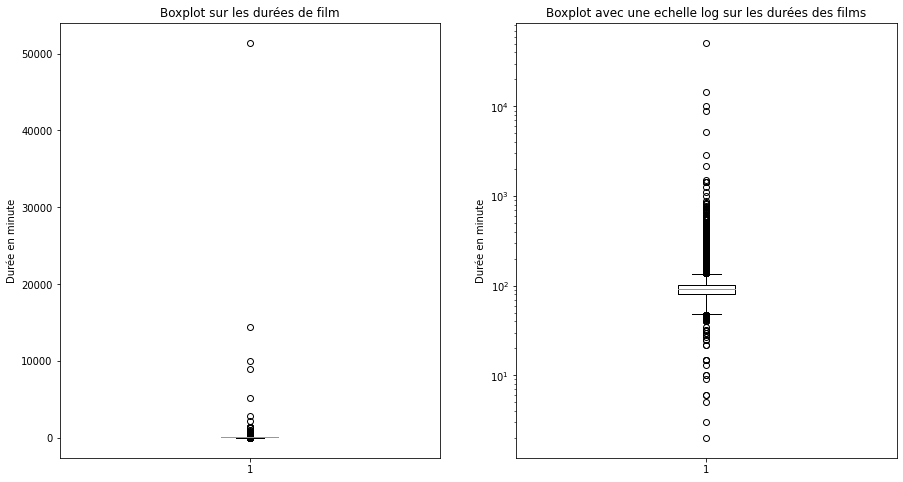

In [18]:
fig, ax = plt.subplots(figsize = (15, 8))

ax1 = plt.subplot(121)
plt.boxplot(global_movie['runtimeMinutes'])
ax1.set_title("Boxplot sur les durées de film")
ax1.set_ylabel("Durée en minute")

ax2 = plt.subplot(122)
ax2.boxplot(global_movie['runtimeMinutes'])
ax2.set_yscale('log')
ax2.set_title('Boxplot avec une echelle log sur les durées des films')
ax2.set_ylabel('Durée en minute')

Nous pouvons observer qu'il y a enormement d'outliers !

In [19]:
global_movie['runtimeMinutes'].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000        2.0
0.001       45.0
0.050       58.0
0.100       68.0
0.200       78.0
0.300       84.0
0.400       88.0
0.500       91.0
0.600       95.0
0.700      100.0
0.800      106.0
0.900      120.0
0.950      136.0
0.999      288.0
1.000    51420.0
Name: runtimeMinutes, dtype: float64

Nous observons que 10% des films ont une durée inférieur a 58 minutes.

##Etude sur les eventuels outliers

### Etude sur les films d'une durée inférieur à 60 minutes

In [20]:
global_movie_60min=global_movie.loc[(global_movie["runtimeMinutes"]<60)]

In [21]:
global_movie_60min.shape

(12439, 7)

Nous pouvons constater que 12439 films ont une durée inférieur a 60 minutes

In [22]:
global_movie_60min

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
1172,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.4,11
1246,tt0001258,Den hvide slavehandel,1910,45,Drama,5.7,101
1273,tt0001285,The Life of Moses,1909,50,"Biography,Drama,Family",5.4,29
1485,tt0001498,The Battle of Trafalgar,1911,51,War,7.7,6
1794,tt0001812,Oedipus Rex,1911,56,Drama,6.3,6
...,...,...,...,...,...,...,...
7814048,tt9895608,Un fleuve invisible,2019,52,Documentary,6.8,6
7815992,tt9899716,Star Trek Enterprise II: Der Anfang vom Ende,2016,58,"Animation,Sci-Fi",7.9,18
7816150,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",6.8,208
7818273,tt9904530,Scream Returns,2018,48,"Horror,Thriller",5.6,17


In [23]:
global_movie_60min["numVotes"].describe()

count    12439.000000
mean        84.708256
std        732.712093
min          5.000000
25%          8.000000
50%         16.000000
75%         40.000000
max      43172.000000
Name: numVotes, dtype: float64

In [24]:
global_movie_60min.sort_values("numVotes", ascending=False).head(25)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
15092,tt0015324,Sherlock Jr.,1924,45,"Action,Comedy,Romance",8.2,43172
5364371,tt4573394,Endless Corridor,2014,52,"Documentary,History",6.2,37362
4503147,tt2591814,Koto no ha no niwa,2013,46,"Animation,Drama,Romance",7.5,36260
2537677,tt12749596,Host,2020,57,"Horror,Mystery",6.6,19037
4118761,tt2061702,Hotarubi no mori e,2011,45,"Animation,Drama,Fantasy",7.9,14449
263856,tt0275230,Blood: The Last Vampire,2000,48,"Action,Animation,Horror",6.7,12021
7322173,tt8858104,Guava Island,2019,55,"Comedy,Drama,Music",6.7,9622
138173,tt0142236,Dragon Ball Z: Fukkatsu no Fusion!! Gokuu to V...,1995,51,"Action,Animation,Sci-Fi",7.7,9545
16089,tt0016332,Seven Chances,1925,56,"Comedy,Romance",7.9,9430
14932,tt0015163,The Navigator,1924,59,"Action,Comedy,Romance",7.7,9209


Beaucoup de film sont très bien noté, ce serai dommage de ne pas les inclures dans notre systeme de reccommendation

### Etude sur les films d'une durée inférieur à 45 minutes

In [25]:
global_movie_45min=global_movie.loc[(global_movie["runtimeMinutes"]<45)]

In [26]:
global_movie_45min.sort_values("numVotes", ascending=False).head(25)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
419117,tt0436194,Courage & Stupidity,2005,25,"Comedy,Fantasy,Short",7.0,1433
178290,tt0184773,The Nazis Strike,1943,41,"Documentary,History,Short",7.0,773
414459,tt0431405,Sleeping Dogs Lie,2005,25,"Drama,Mystery,Short",6.5,187
3456055,tt14355790,Survivor Cemal Can Party,2021,43,Music,1.9,123
4326043,tt2290641,Set Up,2012,10,Crime,5.3,82
7696716,tt9649326,Roofied 4: The Antidote,2019,44,"Action,Crime,Short",1.2,79
1086901,tt10207588,Floripes,2020,40,"Biography,Documentary",9.6,76
6797526,tt7737176,#TAKEMEANYWHERE,2018,44,"Adventure,Documentary,Short",7.4,73
6536070,tt7177596,Maxxx,2017,6,"Comedy,Short",7.5,66
1175108,tt10362478,Doctor Who: The Runaway,2019,13,"Action,Adventure,Animation",6.3,33


Nous constatons que beaucoup de ces films non pas reçu un grand nombres de votes, nous décidons donc d'exclure les films d'une durée inférieur a 45 minutes

### Etude sur les films d'une durée supérieur à 240 minutes

In [27]:
global_movie_240min=global_movie.loc[(global_movie["runtimeMinutes"]>240)]

In [28]:
global_movie_240min.shape

(430, 7)

Nous avons 430 films d'une durée supérieur à 240 minutes

In [29]:
global_movie_240min.sort_values("numVotes", ascending=False).head(25)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
2316044,tt12361974,Zack Snyder's Justice League,2021,242,"Action,Adventure,Fantasy",8.1,262531
4014951,tt1954470,Gangs of Wasseypur,2012,321,"Action,Comedy,Crime",8.2,83864
408824,tt0425637,Chi bi,2008,288,"Action,Adventure,Drama",7.4,44055
113901,tt0116477,Hamlet,1996,242,Drama,7.7,36214
104680,tt0107007,Gettysburg,1993,271,"Drama,History,War",7.6,26237
72568,tt0074084,Novecento,1976,317,"Drama,History",7.7,22776
332024,tt0346336,La meglio gioventù,2003,366,"Drama,Romance",8.5,20838
5675731,tt5275892,O.J.: Made in America,2016,467,"Biography,Crime,Documentary",8.9,17876
108925,tt0111341,Sátántangó,1994,439,Drama,8.4,9669
58133,tt0059245,The Greatest Story Ever Told,1965,260,"Biography,Drama,History",6.6,9393


In [30]:
global_movie_240min.sort_values("numVotes", ascending=True).head(25)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
4173619,tt2119440,Il Trittico,2009,300,Music,8.4,5
5170970,tt4140944,Highway Star: A Journey in Rock,2007,380,Documentary,7.2,5
7486115,tt9205126,Walking with C.S. Lewis,2017,295,Documentary,8.6,5
4807204,tt3312866,Les Vêpres siciliennes,2013,285,"Drama,Music",7.0,5
1301698,tt10585082,Le village - Première saison,2019,280,Documentary,7.4,5
1597774,tt11100434,Wilder vs. Ortiz,2019,270,Sport,7.2,5
2102921,tt11986966,Reiwa Uprising,2019,248,Documentary,7.4,5
172432,tt0178472,Français si vous saviez,1973,465,"Documentary,History,War",8.0,5
4528919,tt2654746,Living Neverland,2013,317,"Adventure,Documentary,Family",4.2,5
6384441,tt6852310,Alan Clarke: Out of His Own Light,2016,270,Documentary,8.0,5


Sachant que seulement 430 films ont une durée supérieur à 240 minutes nous décidons de garder ces films pour une base de donnée plus complètes 

### Etude sur les films d'une durée supérieur à 600 minutes

In [31]:
global_movie_600min=global_movie.loc[(global_movie["runtimeMinutes"]>600)]

In [32]:
global_movie_600min.shape

(33, 7)

In [33]:
global_movie_600min.sort_values("numVotes", ascending=False).head(25)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
236066,tt0246135,"Out 1, noli me tangere",1971,776,"Drama,Mystery",7.8,1203
7411441,tt9047474,La flor,2016,808,"Drama,Fantasy,Musical",7.6,560
6700391,tt7528992,Europa: The Last Battle,2017,746,"Documentary,History,War",7.6,507
272275,tt0284020,The Cure for Insomnia,1987,5220,"Documentary,Music",5.2,347
5719935,tt5375100,Paint Drying,2016,607,Documentary,9.4,337
4066712,tt2008009,The Clock,2010,1440,Drama,8.7,264
7303766,tt8819192,Women Make Film: A New Road Movie Through Cinema,2018,840,"Documentary,History",7.7,218
328492,tt0342707,The Longest Most Meaningless Movie in the World,1970,2880,"Documentary,Drama,History",5.6,172
93890,tt0095979,Resan,1987,873,"Documentary,War",7.4,90
4009,tt0004052,The Hazards of Helen,1914,1428,Action,7.0,84


Beaucoup de ces films n'ont pas reçu énormement de votes, nous décidons donc de supprimer les film d'une durée supérieur à 600 minutes

## Etude des films d'une durée compris entre 45 minutes et 600 minutes

In [34]:
global_movie=global_movie.loc[(global_movie["runtimeMinutes"]>=60)&(global_movie["runtimeMinutes"]<=600)]

Text(0, 0.5, 'Durée en minute')

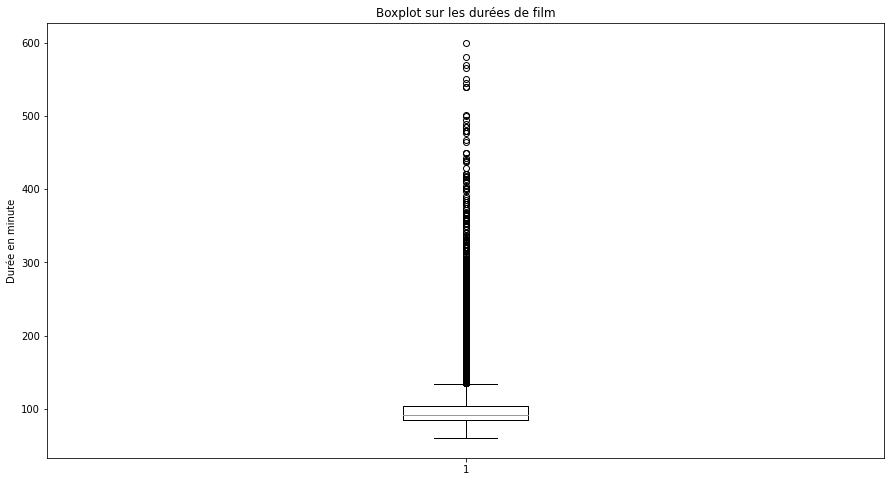

In [35]:
fig, ax = plt.subplots(figsize = (15, 8))

ax1 = plt.subplot(111)
plt.boxplot(global_movie['runtimeMinutes'])
ax1.set_title("Boxplot sur les durées de film")
ax1.set_ylabel("Durée en minute")

Nous observons que beaucoup de film ont une durée importante mais pour garder une bonne base de donnée nous décidons donc de garder les films d'une durée comprise entre 150 minutes et 600 minutes

**Les films de notre base de donnée auront donc une durée comprise entre 45 et 600 minutes**

# Etude de la variables "startYear"

In [36]:
#Definition d'une fonction pour créer une colonne décénnie
def todecade(y):
  return str(y)[:3] + '0' 

In [37]:
global_movie["decade"] = global_movie["startYear"].apply(todecade)#Création de la colonne "decade"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
decade_numVote=global_movie.pivot_table(values = "numVotes" , index = "decade", aggfunc="sum")

In [39]:
decade_numVote["Décénnie"]=decade_numVote.index

In [40]:
decade_numVote

,numVotes,Décénnie
decade,,
1890,44,1890
1900,961,1900
1910,152216,1910
1920,1612656,1920
1930,5278898,1930
1940,8397253,1940
1950,13807109,1950
1960,18863608,1960
1970,31726722,1970


In [41]:
decade_Rating=global_movie.pivot_table(values = "averageRating" , index = "decade", aggfunc="mean")

In [42]:
decade_Rating["Décénnie"]=decade_Rating.index

In [43]:
decade_Rating

,averageRating,Décénnie
decade,,
1890,5.150000,1890
1900,5.780000,1900
1910,6.117034,1910
1920,6.324461,1920
1930,6.185842,1930
1940,6.271696,1940
1950,6.219422,1950
1960,6.146180,1960
1970,5.986781,1970


In [44]:
decade_count=global_movie.pivot_table(values = "tconst" , index = "decade", aggfunc="count")

In [45]:
decade_count["Décénnie"]=decade_count.index

In [46]:
decade_count

,tconst,Décénnie
decade,,
1890,2,1890
1900,5,1900
1910,499,1910
1920,2273,1920
1930,7176,1930
1940,7218,1940
1950,10684,1950
1960,13889,1960
1970,17709,1970


Text(0, 0.5, 'moyenne des notes')

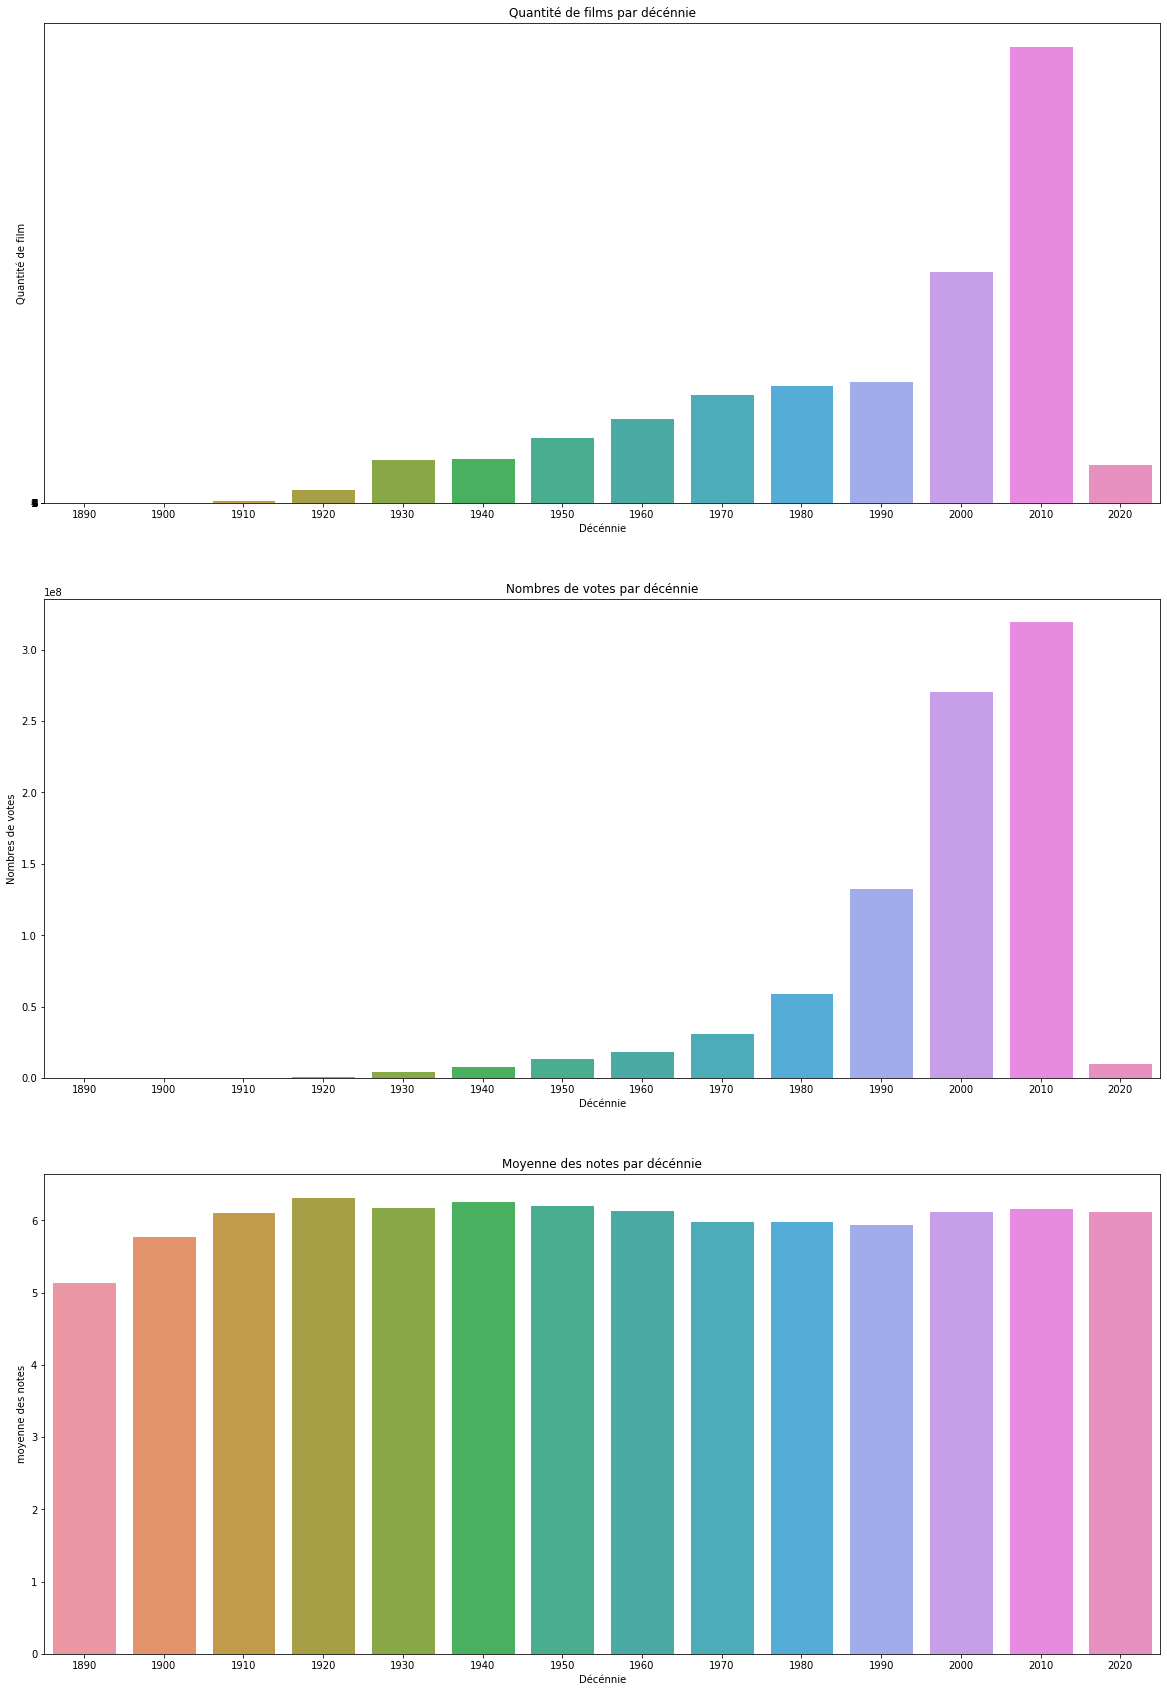

In [47]:
fig, ax = plt.subplots(3,1,figsize=(20,30))

sns.set_theme()#Choix d'un theme

#Premier graphique
sns.barplot(ax=ax[0],data=decade_count , x = "Décénnie" , y= "tconst")
ax[0].set_title("Quantité de films par décénnie")#Titre
ax[0].set_ylabel("Quantité de film")#Titre des ordonnées

#Deuxième graphique
sns.barplot(ax=ax[1],data=decade_numVote, x = "Décénnie" , y= "numVotes")
ax[1].set_title("Nombres de votes par décénnie")#Titre
ax[1].set_ylabel("Nombres de votes")#Titre des ordonnées

#Troisième graphique
g=sns.barplot(ax=ax[2],data=decade_Rating , x = "Décénnie" , y= "averageRating" , )
ax[2].set_title("Moyenne des notes par décénnie")#Titre
ax[0].set_yticks(range(0,10,1))
ax[2].set_ylabel("moyenne des notes")#Titre des ordonnées


Nous observons qu'à partir de la décennie 1980 les films commence a avoir un nombres de votes satisfaisant. La moyenne des notes avant 1980 sont biaisé du faites que le nombre de votes est peu important. Nous décidons d'aller jeter un oeil sur les films de 1960 à 1979 pour décider a partir de quelle année les films commence a avoir un nombre de votes satisfaisant 

## Etude sur les années de 1960 à 1979

In [48]:
global_movie_1960_1979=global_movie.loc[(global_movie["startYear"]>=1960)&(global_movie["startYear"]<1980)]

In [49]:
global_movie_1960_1979.shape

(31598, 8)

Nous avons 31598 films entre les année 1960 et 1979

In [50]:
global_movie_1960_1979.sort_values("numVotes",ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
67289,tt0068646,The Godfather,1972,175,"Crime,Drama",9.2,1646788,1970
75166,tt0076759,Star Wars,1977,121,"Action,Adventure,Fantasy",8.6,1245194,1970
70112,tt0071562,The Godfather: Part II,1974,202,"Crime,Drama",9.0,1146645,1970
71985,tt0073486,One Flew Over the Cuckoo's Nest,1975,133,Drama,8.7,929061,1970
77105,tt0078748,Alien,1979,117,"Horror,Sci-Fi",8.4,798472,1970
65597,tt0066921,A Clockwork Orange,1971,136,"Crime,Drama,Sci-Fi",8.3,766484,1970
73760,tt0075314,Taxi Driver,1976,114,"Crime,Drama",8.2,736555,1970
59057,tt0060196,"Il buono, il brutto, il cattivo",1966,161,Western,8.8,697048,1960
77145,tt0078788,Apocalypse Now,1979,147,"Drama,Mystery,War",8.4,614385,1970
53208,tt0054215,Psycho,1960,109,"Horror,Mystery,Thriller",8.5,612344,1960


In [51]:
year_numVotes=global_movie_1960_1979.pivot_table(values = "numVotes" , index = "startYear", aggfunc="sum")
year_numVotes["Year"]=year_numVotes.index

In [52]:
year_rating=global_movie_1960_1979.pivot_table(values = "averageRating" , index = "startYear", aggfunc="mean")
year_rating["Year"]=year_rating.index

[Text(0, 0, '1960'),
 Text(0, 0, '1961'),
 Text(0, 0, '1962'),
 Text(0, 0, '1963'),
 Text(0, 0, '1964'),
 Text(0, 0, '1965'),
 Text(0, 0, '1966'),
 Text(0, 0, '1967'),
 Text(0, 0, '1968'),
 Text(0, 0, '1969'),
 Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979')]

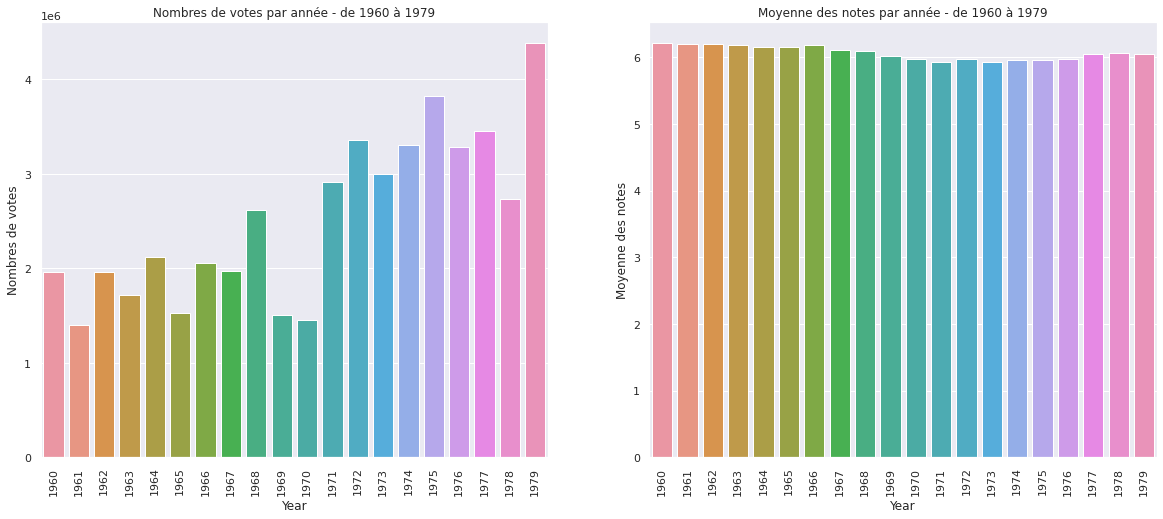

In [53]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

sns.set_theme()#Choix d'un theme

#Premier graphique

sns.barplot(ax=ax[0],data=year_numVotes , x = "Year" , y= "numVotes")
ax[0].set_title("Nombres de votes par année - de 1960 à 1979")#Titre
ax[0].set_ylabel("Nombres de votes")#Titre des ordonnées
ax[0].set_xticklabels(labels=year_numVotes.index,rotation=90)
#Deuxième graphique
sns.barplot(ax=ax[1],data=year_rating, x = "Year" , y= "averageRating")
ax[1].set_title("Moyenne des notes par année - de 1960 à 1979")#Titre
ax[1].set_ylabel("Moyenne des notes")#Titre des ordonnées
ax[1].set_xticklabels(labels=year_rating.index,rotation=90)

Beaucoup de bon films classique dans ces années nous décidons de ne pas filtrer après 1960, Etudions donc la décennie 1950

## Etude sur la décennie 1950

In [54]:
global_movie_1950=global_movie.loc[(global_movie["startYear"]>=1950)&(global_movie["startYear"]<1960)]

In [55]:
global_movie_1950.shape

(10684, 8)

10684 films dans les années 50

In [56]:
global_movie_1950.sort_values("numVotes",ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
49196,tt0050083,12 Angry Men,1957,96,"Crime,Drama",9.0,701877,1950
46556,tt0047396,Rear Window,1954,112,"Mystery,Thriller",8.4,449646,1950
51399,tt0052357,Vertigo,1958,128,"Mystery,Romance,Thriller",8.3,369399,1950
46635,tt0047478,Shichinin no samurai,1954,207,"Action,Adventure,Drama",8.6,319841,1950
52144,tt0053125,North by Northwest,1959,136,"Adventure,Mystery,Thriller",8.3,302615,1950
52303,tt0053291,Some Like It Hot,1959,121,"Comedy,Music,Romance",8.2,246913,1950
51651,tt0052618,Ben-Hur,1959,212,"Adventure,Drama,History",8.1,222047,1950
44362,tt0045152,Singin' in the Rain,1952,103,"Comedy,Musical,Romance",8.3,221955,1950
49323,tt0050212,The Bridge on the River Kwai,1957,161,"Adventure,Drama,War",8.1,205804,1950
42270,tt0043014,Sunset Blvd.,1950,110,"Drama,Film-Noir",8.4,204310,1950


In [57]:
year_numVotes=global_movie_1950.pivot_table(values = "numVotes" , index = "startYear", aggfunc="sum")
year_numVotes["Year"]=year_numVotes.index

In [58]:
year_rating=global_movie_1950.pivot_table(values = "averageRating" , index = "startYear", aggfunc="mean")
year_rating["Year"]=year_rating.index

[Text(0, 0, '1950'),
 Text(0, 0, '1951'),
 Text(0, 0, '1952'),
 Text(0, 0, '1953'),
 Text(0, 0, '1954'),
 Text(0, 0, '1955'),
 Text(0, 0, '1956'),
 Text(0, 0, '1957'),
 Text(0, 0, '1958'),
 Text(0, 0, '1959')]

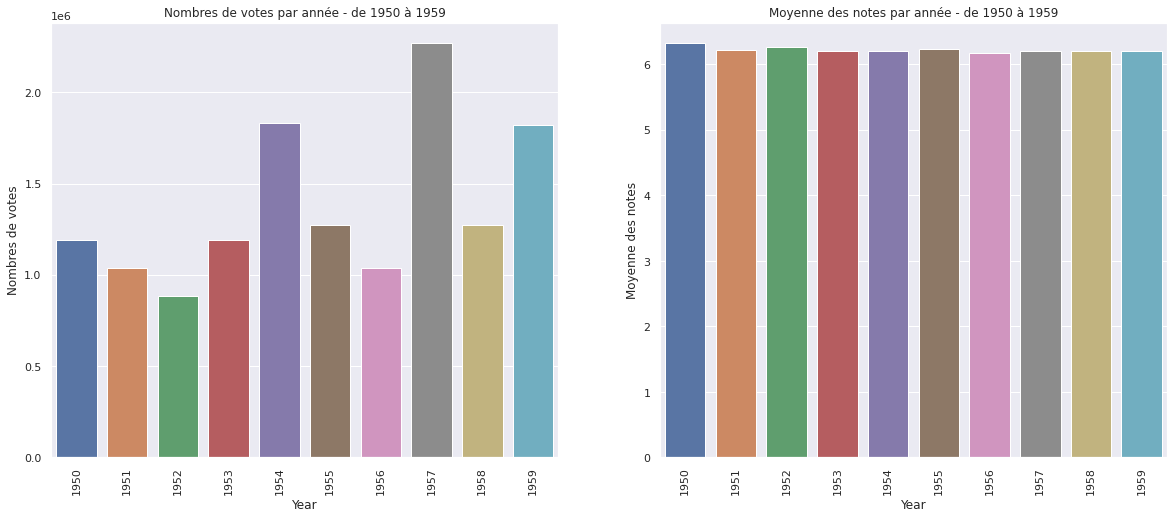

In [59]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

sns.set_theme()#Choix d'un theme

#Premier graphique

sns.barplot(ax=ax[0],data=year_numVotes , x = "Year" , y= "numVotes")
ax[0].set_title("Nombres de votes par année - de 1950 à 1959")#Titre
ax[0].set_ylabel("Nombres de votes")#Titre des ordonnées
ax[0].set_xticklabels(labels=year_numVotes.index,rotation=90)
#Deuxième graphique
sns.barplot(ax=ax[1],data=year_rating, x = "Year" , y= "averageRating")
ax[1].set_title("Moyenne des notes par année - de 1950 à 1959")#Titre
ax[1].set_ylabel("Moyenne des notes")#Titre des ordonnées
ax[1].set_xticklabels(labels=year_rating.index,rotation=90)

Encore de grands classique dans ces années nous décidons de ne pas filtrer après 1950, Etudions donc la décennie 1940

## Etude sur la décennie 1940

In [60]:
global_movie_1940=global_movie.loc[(global_movie["startYear"]>=1940)&(global_movie["startYear"]<1950)]

In [61]:
global_movie_1940.shape

(7218, 8)

In [62]:
global_movie_1940.sort_values("numVotes",ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
33977,tt0034583,Casablanca,1942,102,"Drama,Romance,War",8.5,528239,1940
37980,tt0038650,It's a Wonderful Life,1946,130,"Drama,Family,Fantasy",8.6,410691,1940
32878,tt0033467,Citizen Kane,1941,119,"Drama,Mystery",8.3,409771,1940
31980,tt0032553,The Great Dictator,1940,125,"Comedy,Drama,War",8.4,205829,1940
41236,tt0041959,The Third Man,1949,104,"Film-Noir,Mystery,Thriller",8.1,160682,1940
33275,tt0033870,The Maltese Falcon,1941,100,"Crime,Film-Noir,Mystery",8.0,150144,1940
39829,tt0040522,Ladri di biciclette,1948,89,Drama,8.3,149019,1940
36138,tt0036775,Double Indemnity,1944,107,"Crime,Drama,Film-Noir",8.3,145489,1940
32329,tt0032910,Pinocchio,1940,88,"Animation,Comedy,Family",7.4,133092,1940
33888,tt0034492,Bambi,1942,70,"Animation,Drama,Family",7.3,132743,1940


In [63]:
year_numVotes=global_movie_1940.pivot_table(values = "numVotes" , index = "startYear", aggfunc="sum")
year_numVotes["Year"]=year_numVotes.index

In [64]:
year_rating=global_movie_1940.pivot_table(values = "averageRating" , index = "startYear", aggfunc="mean")
year_rating["Year"]=year_rating.index

[Text(0, 0, '1940'),
 Text(0, 0, '1941'),
 Text(0, 0, '1942'),
 Text(0, 0, '1943'),
 Text(0, 0, '1944'),
 Text(0, 0, '1945'),
 Text(0, 0, '1946'),
 Text(0, 0, '1947'),
 Text(0, 0, '1948'),
 Text(0, 0, '1949')]

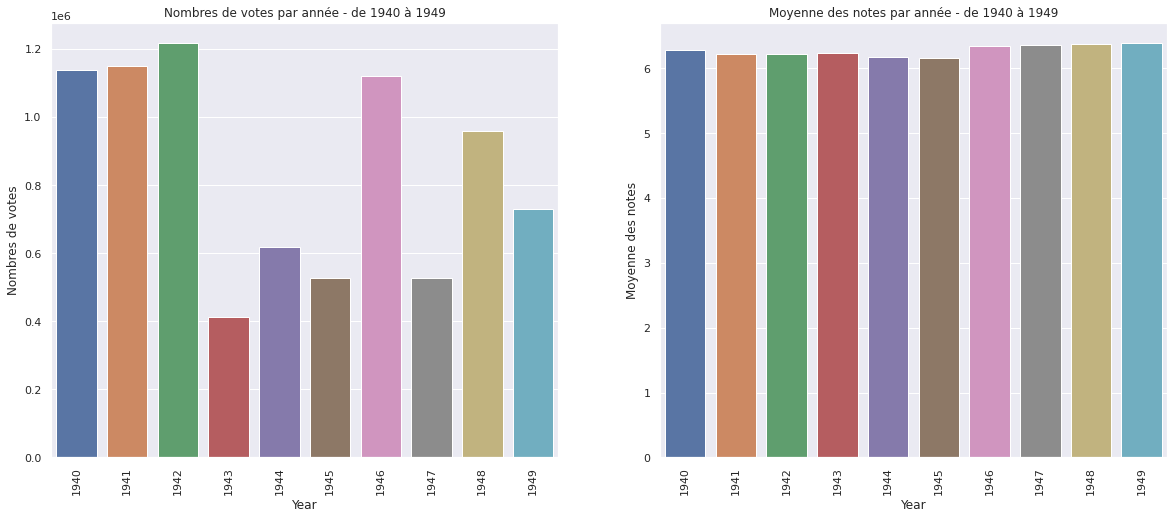

In [65]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

sns.set_theme()#Choix d'un theme

#Premier graphique

sns.barplot(ax=ax[0],data=year_numVotes , x = "Year" , y= "numVotes")
ax[0].set_title("Nombres de votes par année - de 1940 à 1949")#Titre
ax[0].set_ylabel("Nombres de votes")#Titre des ordonnées
ax[0].set_xticklabels(labels=year_numVotes.index,rotation=90)
#Deuxième graphique
sns.barplot(ax=ax[1],data=year_rating, x = "Year" , y= "averageRating")
ax[1].set_title("Moyenne des notes par année - de 1940 à 1949")#Titre
ax[1].set_ylabel("Moyenne des notes")#Titre des ordonnées
ax[1].set_xticklabels(labels=year_rating.index,rotation=90)

Le nombre de votes commence a baissé mais la qualité de certain films nous oblige a garder cette décénnie. Etudions 1930

## Etude sur les décennie 1915 & 1930

In [66]:
global_movie_1915_1930=global_movie.loc[(global_movie["startYear"]>=1915)&(global_movie["startYear"]<1940)]

In [67]:
global_movie_1915_1930.shape

(9859, 8)

In [68]:
global_movie_1915_1930.sort_values("numVotes",ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
31573,tt0032138,The Wizard of Oz,1939,102,"Adventure,Family,Fantasy",8.0,373439,1930
30833,tt0031381,Gone with the Wind,1939,238,"Drama,History,Romance",8.1,293292,1930
27490,tt0027977,Modern Times,1936,87,"Comedy,Drama,Family",8.5,221337,1930
29076,tt0029583,Snow White and the Seven Dwarfs,1937,83,"Animation,Family,Fantasy",7.6,183592,1930
21409,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",8.5,170184,1930
16890,tt0017136,Metropolis,1927,153,"Drama,Sci-Fi",8.3,162040,1920
21750,tt0022100,M - Eine Stadt sucht einen Mörder,1931,117,"Crime,Mystery,Thriller",8.3,145556,1930
12176,tt0012349,The Kid,1921,68,"Comedy,Drama,Family",8.3,115515,1920
31127,tt0031679,Mr. Smith Goes to Washington,1939,129,"Comedy,Drama",8.1,108136,1930
15629,tt0015864,The Gold Rush,1925,95,"Adventure,Comedy,Drama",8.2,102655,1920


In [69]:
year_numVotes=global_movie_1915_1930.pivot_table(values = "numVotes" , index = "startYear", aggfunc="sum")
year_numVotes["Year"]=year_numVotes.index

In [70]:
year_rating=global_movie_1915_1930.pivot_table(values = "averageRating" , index = "startYear", aggfunc="mean")
year_rating["Year"]=year_rating.index

[Text(0, 0, '1915'),
 Text(0, 0, '1916'),
 Text(0, 0, '1917'),
 Text(0, 0, '1918'),
 Text(0, 0, '1919'),
 Text(0, 0, '1920'),
 Text(0, 0, '1921'),
 Text(0, 0, '1922'),
 Text(0, 0, '1923'),
 Text(0, 0, '1924'),
 Text(0, 0, '1925'),
 Text(0, 0, '1926'),
 Text(0, 0, '1927'),
 Text(0, 0, '1928'),
 Text(0, 0, '1929'),
 Text(0, 0, '1930'),
 Text(0, 0, '1931'),
 Text(0, 0, '1932'),
 Text(0, 0, '1933'),
 Text(0, 0, '1934'),
 Text(0, 0, '1935'),
 Text(0, 0, '1936'),
 Text(0, 0, '1937'),
 Text(0, 0, '1938'),
 Text(0, 0, '1939')]

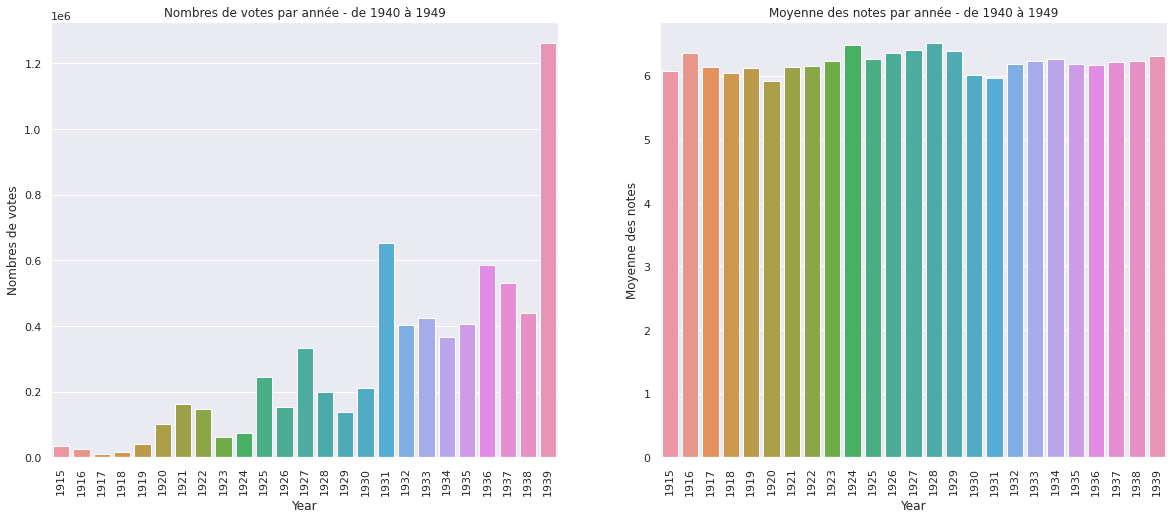

In [71]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

sns.set_theme()#Choix d'un theme

#Premier graphique

sns.barplot(ax=ax[0],data=year_numVotes , x = "Year" , y= "numVotes")
ax[0].set_title("Nombres de votes par année - de 1940 à 1949")#Titre
ax[0].set_ylabel("Nombres de votes")#Titre des ordonnées
ax[0].set_xticklabels(labels=year_numVotes.index,rotation=90)
#Deuxième graphique
sns.barplot(ax=ax[1],data=year_rating, x = "Year" , y= "averageRating")
ax[1].set_title("Moyenne des notes par année - de 1940 à 1949")#Titre
ax[1].set_ylabel("Moyenne des notes")#Titre des ordonnées
ax[1].set_xticklabels(labels=year_rating.index,rotation=90)

Nous décidons de commencer notre base de donnée a partir de l'année 1920, en effet le nombre de note commence a évoluer a partir de cette année, nous ne pouvons exclure certain films

**Enfin, on ne peut pas virer "d'un bloc" les vieux films car même s'ils sont peu, y en a des trop bien notés pour s'en passer**

In [72]:
global_movie=global_movie.loc[(global_movie["startYear"]>=1920)]

# Etude de la variables "genres"

## Factorisation de la variables "genres"

In [73]:
global_movie_genre = pd.concat([global_movie.drop('genres', 1), global_movie['genres'].str.get_dummies(sep=",")], 1)

In [74]:
global_movie_genre.iloc[:,7:]

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
5013,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8810,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9922,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10186,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7823839,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7823853,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7823892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7823937,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


##Etude des genres en fonction du nombre de votes

### Création d'un tableau du nombres de notes des genre par décennie

In [75]:
numVotes_genre = pd.DataFrame(columns=['decade'])

for column in global_movie_genre.iloc[:,7:]:

  movie=global_movie_genre.loc[(global_movie_genre[column]==1)]

  movie.drop(movie.iloc[:,7:],1,inplace=True)

  movie.drop(movie.iloc[:,:2],1,inplace=True)

  numVotes_decade=movie.pivot_table(values = "numVotes" , index = "decade", aggfunc="sum")

  numVotes_decade.rename(columns={"numVotes": column}, inplace=True)

  numVotes_genre=pd.concat([numVotes_genre,numVotes_decade], axis=1)
  


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is 

In [76]:
numVotes_genre

,decade,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1920,NaN,149876,NaN,272331,5574,63769,532539,70816,57998,1059049,158088,228726,8391.0,NaN,153667,240728,36353,34685,101651,NaN,NaN,362586,173486,14689,NaN,144353,19404,24969
1930,NaN,253306,NaN,887548,191115,124275,1895633,834120,29961,2882699,923404,735200,105893.0,NaN,435969,535021,98020,396536,511841,34.0,NaN,1841243,286783,41058,NaN,368303,254696,87505
1940,NaN,401086,NaN,637920,541584,173336,1906696,1659511,14508,5900680,1126984,820222,1689676.0,NaN,244346,290809,186480,236953,1613949,NaN,NaN,2332393,57152,39540,NaN,648807,1245069,302140
1950,NaN,893033,NaN,2531306,693706,338595,2434148,2971423,20448,8522568,828171,760898,1272049.0,NaN,754596,778166,397219,781927,1846061,6.0,NaN,2935764,777314,49736,NaN,2323138,995915,786285
1960,NaN,2540250,130.0,4384185,492741,1326114,4663928,2575141,93786,9733391,1129394,589198,NaN,NaN,960762,2180165,188934,603894,1698407,NaN,NaN,2512206,1298404,165867,NaN,2801105,886268,2333822
1970,NaN,5361321,75409.0,5812613,621663,1336926,6961584,8370421,253854,17443039,763982,2607006,NaN,NaN,888796,4191546,507765,941099,2655010,7.0,241.0,2206353,3598607,918941,NaN,4584488,1726181,808163
1980,NaN,18834682,60156.0,17329779,2373121,2640405,20444865,8454453,299949,23553013,3521617,7606883,NaN,NaN,1726098,8093745,1418189,546313,2786915,NaN,NaN,5268945,9269952,1646607,NaN,7764274,2134116,251413
1990,NaN,34340983,6579.0,23994324,7351400,7417278,42956135,34413356,477126,75901355,7215362,11100400,NaN,NaN,4103324,8194349,2146808,528527,12660777,NaN,NaN,20121207,14321725,2554694,NaN,23498976,2342684,871919
2000,NaN,90674928,5078.0,71917600,18137074,15624961,83998683,53511106,3254656,135134223,16128251,28498605,NaN,NaN,7360501,21212575,5660199,2467832,29726592,154679.0,1024.0,39232937,29605865,5717376,NaN,47109186,5234765,234465


In [77]:
numVotes_genre["decade"]=numVotes_genre.index

In [78]:
numVotes_genre.fillna(0, inplace=True)

Création du ligne pour le total de nombres de votes

In [86]:
numVotes_genre.loc['total_numVotes'] = numVotes_genre.iloc[:, 1:].sum()

In [84]:
numVotes_genre=numVotes_genre.iloc[:-1,:]

In [88]:
numVotes_genre

,decade,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1920,1920,149876.0,0.0,272331.0,5574.0,63769.0,532539.0,70816.0,57998.0,1059049.0,158088.0,228726.0,8391.0,0.0,153667.0,240728.0,36353.0,34685.0,101651.0,0.0,0.0,362586.0,173486.0,14689.0,0.0,144353.0,19404.0,24969.0
1930,1930,253306.0,0.0,887548.0,191115.0,124275.0,1895633.0,834120.0,29961.0,2882699.0,923404.0,735200.0,105893.0,0.0,435969.0,535021.0,98020.0,396536.0,511841.0,34.0,0.0,1841243.0,286783.0,41058.0,0.0,368303.0,254696.0,87505.0
1940,1940,401086.0,0.0,637920.0,541584.0,173336.0,1906696.0,1659511.0,14508.0,5900680.0,1126984.0,820222.0,1689676.0,0.0,244346.0,290809.0,186480.0,236953.0,1613949.0,0.0,0.0,2332393.0,57152.0,39540.0,0.0,648807.0,1245069.0,302140.0
1950,1950,893033.0,0.0,2531306.0,693706.0,338595.0,2434148.0,2971423.0,20448.0,8522568.0,828171.0,760898.0,1272049.0,0.0,754596.0,778166.0,397219.0,781927.0,1846061.0,6.0,0.0,2935764.0,777314.0,49736.0,0.0,2323138.0,995915.0,786285.0
1960,1960,2540250.0,130.0,4384185.0,492741.0,1326114.0,4663928.0,2575141.0,93786.0,9733391.0,1129394.0,589198.0,0.0,0.0,960762.0,2180165.0,188934.0,603894.0,1698407.0,0.0,0.0,2512206.0,1298404.0,165867.0,0.0,2801105.0,886268.0,2333822.0
1970,1970,5361321.0,75409.0,5812613.0,621663.0,1336926.0,6961584.0,8370421.0,253854.0,17443039.0,763982.0,2607006.0,0.0,0.0,888796.0,4191546.0,507765.0,941099.0,2655010.0,7.0,241.0,2206353.0,3598607.0,918941.0,0.0,4584488.0,1726181.0,808163.0
1980,1980,18834682.0,60156.0,17329779.0,2373121.0,2640405.0,20444865.0,8454453.0,299949.0,23553013.0,3521617.0,7606883.0,0.0,0.0,1726098.0,8093745.0,1418189.0,546313.0,2786915.0,0.0,0.0,5268945.0,9269952.0,1646607.0,0.0,7764274.0,2134116.0,251413.0
1990,1990,34340983.0,6579.0,23994324.0,7351400.0,7417278.0,42956135.0,34413356.0,477126.0,75901355.0,7215362.0,11100400.0,0.0,0.0,4103324.0,8194349.0,2146808.0,528527.0,12660777.0,0.0,0.0,20121207.0,14321725.0,2554694.0,0.0,23498976.0,2342684.0,871919.0
2000,2000,90674928.0,5078.0,71917600.0,18137074.0,15624961.0,83998683.0,53511106.0,3254656.0,135134223.0,16128251.0,28498605.0,0.0,0.0,7360501.0,21212575.0,5660199.0,2467832.0,29726592.0,154679.0,1024.0,39232937.0,29605865.0,5717376.0,0.0,47109186.0,5234765.0,234465.0


In [89]:
totalVotes_genre=numVotes_genre.loc["total_numVotes"]

In [90]:
totalVotes_genre.head()

decade               NaN
Action       2.82466e+08
Adult             150916
Adventure    2.33526e+08
Animation    5.02712e+07
Name: total_numVotes, dtype: object

In [92]:
numVotes_genre.fillna(19202020, inplace=True)

### Graphique sur le nombres de votes de chaques genre pour chaque décénnie

In [93]:
df =numVotes_genre.melt("decade", var_name="cols",  value_name="vals")
fig = px.bar(df, x="cols", y="vals", animation_frame="decade",color="cols",title= "Le nombres de votes de chaques genre pour chaque décénnie",labels={'cols':'Genres' , "vals":"Nombre de votes"})
fig.update_yaxes(range=[0, 150000000])


fig.show()

In [94]:
# Export en page web edimensionnabla D3JS
from plotly.offline import plot
plot(fig)

from google.colab import files
files.download('temp-plot.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Graphique sur le total de votes par genre

In [95]:
totalVotes_genre_df = pd.DataFrame(columns=['decade'])
totalVotes_genre=pd.concat([totalVotes_genre_df,totalVotes_genre], axis=1)

In [96]:
totalVotes_genre["decade"]=totalVotes_genre.index

In [97]:
totalVotes_genre.drop("decade", axis=0 , inplace=True)

In [98]:
totalVotes_genre.rename(columns={"decade": "genre"}, inplace=True)

In [99]:
totalVotes_genre

,genre,total_numVotes
Action,Action,2.82466e+08
Adult,Adult,150916
Adventure,Adventure,2.33526e+08
Animation,Animation,5.02712e+07
Biography,Biography,5.76642e+07
Comedy,Comedy,2.6209e+08
Crime,Crime,1.64493e+08
Documentary,Documentary,1.09281e+07
Drama,Drama,4.367e+08
Family,Family,4.24411e+07


In [100]:
fig = px.bar(totalVotes_genre, y="total_numVotes", x="genre" , title="Total des votes pour les genres" )
fig.show()

Nous observons que quelques genre sont très peu noté. Nous décidons directement de supprimer certain genre comme "Adult" , "Game-Show" , "News" , "Réality-TV" , "Talk-show" qui n'entre pas dans le cadre de notre projet, la recommendation de film pour un cinema. Nous allons jeter un oeil sur les genre "Documentary", "Film-Noir", "Music", "Musical" et "Sport". En effet, les catégorie "War" et "Western" ne sont peut être que peu noté mais étant donner que des classiques appartienne a cette catégorie nous ne pouvons que les utiliser

##Etude du genre "Documentary"

In [101]:
global_movie_documentary=global_movie[(global_movie["genres"].str.contains("Documentary"))]

In [102]:
global_movie_documentary

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
11527,tt0011687,Shipwrecked Among Cannibals,1920,60,"Adventure,Documentary",6.8,6,1920
12684,tt0012868,Das Wunder des Schneeschuhs,1920,65,Documentary,7.1,18,1920
13067,tt0013257,Häxan,1922,91,"Documentary,Fantasy,History",7.7,12673,1920
13233,tt0013427,Nanook of the North,1922,78,Documentary,7.6,11140,1920
14810,tt0015039,Kinoglaz,1924,78,Documentary,7.2,927,1920
...,...,...,...,...,...,...,...,...
7823130,tt9914642,Albatross,2017,97,Documentary,8.2,29,2010
7823131,tt9914644,9/11: Escape from the Towers,2018,120,Documentary,8.3,67,2010
7823739,tt9915946,Nuestra película,1993,96,Documentary,6.2,6,1990
7823825,tt9916132,The Mystery of a Buryat Lama,2018,94,"Biography,Documentary,History",4.0,6,2010


Nous avons 29152 films de la catégorie "Documentary"

In [103]:
global_movie_documentary.sort_values("numVotes", ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
297834,tt0310793,Bowling for Columbine,2002,120,"Crime,Documentary,Drama",7.9,140227,2000
346919,tt0361596,Fahrenheit 9/11,2004,122,"Documentary,Drama,War",7.5,126666,2000
374643,tt0390521,Super Size Me,2004,100,Documentary,7.2,101778,2000
309438,tt0322802,Jackass: The Movie,2002,87,"Action,Comedy,Documentary",6.6,82169,2000
478362,tt0497116,An Inconvenient Truth,2006,96,"Documentary,News",7.4,80663,2000
3774351,tt1702443,Justin Bieber: Never Say Never,2011,105,"Documentary,Music",1.6,75098,2010
370254,tt0386032,Sicko,2007,123,"Documentary,Drama",7.9,73809,2000
3718980,tt1645089,Inside Job,2010,109,"Crime,Documentary",8.2,70545,2010
1803886,tt11464826,The Social Dilemma,2020,94,"Documentary,Drama",7.6,68812,2020
474774,tt0493430,Jackass Number Two,2006,92,"Action,Comedy,Documentary",7.0,67051,2000


In [104]:
global_movie_documentary["averageRating"].mean()

7.207460894621297

La note moyenne des film documentaire est assez bonne.

In [105]:
global_movie_documentary["numVotes"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000         5.000
0.001         5.000
0.050         6.000
0.100         7.000
0.200         9.000
0.300        13.000
0.400        19.000
0.500        27.000
0.600        43.000
0.700        73.000
0.800       147.000
0.900       421.900
0.950      1068.000
0.999     40684.526
1.000    140227.000
Name: numVotes, dtype: float64

Effectivement nous constatons qu'environ 75% des documentaires ont moins de 100 votes

In [106]:
global_movie_documentary["averageRating"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000     1.0000
0.001     1.8151
0.050     5.4000
0.100     6.0000
0.200     6.5000
0.300     6.8000
0.400     7.1000
0.500     7.3000
0.600     7.5000
0.700     7.7000
0.800     8.0000
0.900     8.4000
0.950     8.8000
0.999     9.7000
1.000    10.0000
Name: averageRating, dtype: float64

Mais 50% des documentaire on au minimum la moyenne

**Il n'est donc pas judicieux de supprimer cette catégorie**

##Etude du genre "Film-Noir"

In [107]:
global_movie_filmNoir=global_movie[(global_movie["genres"].str.contains("Film-Noir"))]

In [108]:
global_movie_filmNoir.sort_values("numVotes", ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
42270,tt0043014,Sunset Blvd.,1950,110,"Drama,Film-Noir",8.4,204310,1950
41236,tt0041959,The Third Man,1949,104,"Film-Noir,Mystery,Thriller",8.1,160682,1940
33275,tt0033870,The Maltese Falcon,1941,100,"Crime,Film-Noir,Mystery",8.0,150144,1940
36138,tt0036775,Double Indemnity,1944,107,"Crime,Drama,Film-Noir",8.3,145489,1940
43314,tt0044079,Strangers on a Train,1951,101,"Crime,Film-Noir,Thriller",7.9,124341,1950
51353,tt0052311,Touch of Evil,1958,95,"Crime,Drama,Film-Noir",8.0,99152,1950
38117,tt0038787,Notorious,1946,102,"Drama,Film-Noir,Romance",7.9,93176,1940
47561,tt0048424,The Night of the Hunter,1955,92,"Crime,Drama,Film-Noir",8.0,82916,1950
48533,tt0049406,The Killing,1956,84,"Crime,Drama,Film-Noir",8.0,82674,1950
37690,tt0038355,The Big Sleep,1946,114,"Crime,Film-Noir,Mystery",7.9,79407,1940


Beaucoup de film bien noté est présent

In [109]:
global_movie_filmNoir["averageRating"].mean()

6.575749674054754

Nous observons que les film-noir ont une moyenne très correct.

In [110]:
global_movie_filmNoir["numVotes"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000         7.000
0.001         7.766
0.050        52.300
0.100        89.200
0.200       164.600
0.300       278.200
0.400       451.600
0.500       749.000
0.600      1053.800
0.700      1705.600
0.800      2906.800
0.900      6508.400
0.950     13094.700
0.999    170890.952
1.000    204310.000
Name: numVotes, dtype: float64

85% des film-noir on recu un nombre de votes supérieur a 100

In [111]:
global_movie_filmNoir["averageRating"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000    3.3000
0.001    3.5298
0.050    5.5000
0.100    5.8000
0.200    6.1000
0.300    6.3000
0.400    6.4000
0.500    6.6000
0.600    6.7000
0.700    6.9000
0.800    7.1000
0.900    7.4000
0.950    7.6000
0.999    8.3234
1.000    8.4000
Name: averageRating, dtype: float64

50% des films-noir ont au minimum la moyenne !

Nous décidons donc de garder les films-noir

##Etude du genre "Music"

In [112]:
global_movie_music=global_movie[(global_movie["genres"].str.contains("Music"))]

In [113]:
global_movie_music.sort_values("numVotes", ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
243037,tt0253474,The Pianist,2002,150,"Biography,Drama,Music",8.5,743213,2000
4499281,tt2582802,Whiplash,2014,106,"Drama,Music",8.5,732397,2010
5010959,tt3783958,La La Land,2016,128,"Comedy,Drama,Music",8.0,515882,2010
3798775,tt1727824,Bohemian Rhapsody,2018,134,"Biography,Drama,Music",8.0,463336,2010
391857,tt0408236,Sweeney Todd: The Demon Barber of Fleet Street,2007,116,"Drama,Horror,Musical",7.3,347189,2000
3595987,tt1517451,A Star Is Born,2018,136,"Drama,Music,Romance",7.6,342253,2010
3779103,tt1707386,Les Misérables,2012,158,"Drama,History,Musical",7.6,311836,2010
4041262,tt1981677,Pitch Perfect,2012,112,"Comedy,Music,Romance",7.1,279888,2010
4577863,tt2771200,Beauty and the Beast,2017,129,"Family,Fantasy,Musical",7.1,278560,2010
318713,tt0332379,The School of Rock,2003,109,"Comedy,Music",7.1,273106,2000


Egalement beaucoup de bon film

In [114]:
global_movie_music["averageRating"].mean()

6.462379966108078

Une moyenne très correct

In [115]:
global_movie_music["numVotes"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000         5.000
0.001         5.000
0.050         6.000
0.100         8.000
0.200        14.000
0.300        23.000
0.400        38.000
0.500        65.000
0.600       125.000
0.700       256.000
0.800       600.000
0.900      2060.500
0.950      6223.950
0.999    258854.746
1.000    743213.000
Name: numVotes, dtype: float64

Presque 60 % des film on reçu moin de 100 votes

In [116]:
global_movie_music["averageRating"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000     1.0000
0.001     1.6000
0.050     4.2000
0.100     4.9000
0.200     5.5000
0.300     5.9000
0.400     6.3000
0.500     6.5000
0.600     6.8000
0.700     7.1000
0.800     7.5000
0.900     8.0000
0.950     8.4000
0.999     9.4379
1.000    10.0000
Name: averageRating, dtype: float64

50% de ces film ont la moyenne

Nous décidons donc de garder les film music

##Etude du genre "Musical"

In [117]:
global_movie_musical=global_movie[(global_movie["genres"].str.contains("Musical"))]

In [118]:
global_movie_musical.sort_values("numVotes", ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
391857,tt0408236,Sweeney Todd: The Demon Barber of Fleet Street,2007,116,"Drama,Horror,Musical",7.3,347189,2000
3779103,tt1707386,Les Misérables,2012,158,"Drama,History,Musical",7.6,311836,2010
4577863,tt2771200,Beauty and the Beast,2017,129,"Family,Fantasy,Musical",7.1,278560,2010
195182,tt0203009,Moulin Rouge!,2001,127,"Drama,Musical,Romance",7.6,269023,2000
76021,tt0077631,Grease,1978,110,"Musical,Romance",7.2,245415,1970
3565486,tt1485796,The Greatest Showman,2017,105,"Biography,Drama,Musical",7.6,244886,2010
44362,tt0045152,Singin' in the Rain,1952,103,"Comedy,Musical,Romance",8.3,221955,1950
771081,tt0795421,Mamma Mia!,2008,108,"Comedy,Musical,Romance",6.4,219221,2000
287225,tt0299658,Chicago,2002,113,"Comedy,Crime,Musical",7.2,217837,2000
66649,tt0067992,Willy Wonka & the Chocolate Factory,1971,100,"Family,Fantasy,Musical",7.8,180644,1970


In [119]:
global_movie_musical["averageRating"].mean()

6.169559386973188

In [120]:
global_movie_musical["numVotes"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000         5.000
0.001         5.000
0.050         6.000
0.100         8.000
0.200        13.000
0.300        21.000
0.400        34.000
0.500        55.000
0.600       101.000
0.700       194.000
0.800       409.400
0.900      1282.900
0.950      3173.900
0.999    239864.111
1.000    347189.000
Name: numVotes, dtype: float64

In [121]:
global_movie_musical["averageRating"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000    1.2000
0.001    1.5219
0.050    4.0950
0.100    4.7000
0.200    5.3000
0.300    5.7000
0.400    6.0000
0.500    6.3000
0.600    6.5000
0.700    6.8000
0.800    7.1000
0.900    7.5000
0.950    7.9000
0.999    9.2000
1.000    9.4000
Name: averageRating, dtype: float64

Nous garderons egalement musical

##Etude du genre "Sport"

In [122]:
global_movie_sport=global_movie[(global_movie["genres"].str.contains("Sport"))]

In [123]:
global_movie_sport.sort_values("numVotes", ascending=False).head(50)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
116045,tt0118715,The Big Lebowski,1998,117,"Comedy,Crime,Sport",8.1,741410,1990
388860,tt0405159,Million Dollar Baby,2004,132,"Drama,Sport",8.1,642956,2000
73598,tt0075148,Rocky,1976,120,"Drama,Sport",8.1,525402,1970
2632937,tt1291584,Warrior,2011,140,"Action,Drama,Sport",8.2,440603,2010
2168132,tt1210166,Moneyball,2011,133,"Biography,Drama,Sport",7.6,376353,2010
934640,tt0964517,The Fighter,2010,116,"Biography,Drama,Sport",7.8,344322,2010
79671,tt0081398,Raging Bull,1980,129,"Biography,Drama,Sport",8.2,325818,1980
851849,tt0878804,The Blind Side,2009,129,"Biography,Drama,Sport",7.6,297133,2000
1687015,tt1125849,The Wrestler,2008,109,"Drama,Sport",7.9,291298,2000
4705645,tt3076658,Creed,2015,133,"Drama,Sport",7.6,250529,2010


In [124]:
global_movie_sport["averageRating"].mean()

6.562029520295213

In [125]:
global_movie_sport["numVotes"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000         5.000
0.001         5.000
0.050         7.000
0.100        10.000
0.200        20.000
0.300        37.000
0.400        72.000
0.500       138.000
0.600       282.000
0.700       587.900
0.800      1389.800
0.900      5290.900
0.950     19809.100
0.999    465279.509
1.000    741410.000
Name: numVotes, dtype: float64

In [126]:
global_movie_sport["averageRating"].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000    1.3000
0.001    1.6418
0.050    4.3000
0.100    5.0000
0.200    5.6000
0.300    6.0000
0.400    6.4000
0.500    6.7000
0.600    7.0000
0.700    7.2000
0.800    7.6000
0.900    8.1000
0.950    8.4000
0.999    9.6000
1.000    9.9000
Name: averageRating, dtype: float64

Impossible de supprimer cette catégorie également

##Suppression des genres non pertinant

In [127]:
global_movie.drop(global_movie[(global_movie["genres"].str.contains( "Adult" ))].index , axis=0, inplace=True)

In [128]:
global_movie.drop(global_movie[(global_movie["genres"].str.contains( "News" ))].index , axis=0, inplace=True)

In [129]:
global_movie.drop(global_movie[(global_movie["genres"].str.contains( "Talk-show" ))].index , axis=0, inplace=True)

In [130]:
global_movie.drop(global_movie[(global_movie["genres"].str.contains( "Réality-TV" ))].index , axis=0, inplace=True)

In [131]:
global_movie.drop(global_movie[(global_movie["genres"].str.contains( "Game-Show" ))].index , axis=0, inplace=True)

# Etude de la variables "averageRating" & "numVotes" 

In [132]:
global_movie["numVotes"].shape

(213138,)

In [133]:
global_movie["numVotes"].describe()

count    2.131380e+05
mean     4.097798e+03
std      3.575835e+04
min      5.000000e+00
25%      2.000000e+01
50%      7.600000e+01
75%      3.930000e+02
max      2.377444e+06
Name: numVotes, dtype: float64

In [134]:
global_movie['numVotes'].quantile([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.999, 1])

0.000          5.000
0.001          5.000
0.050          7.000
0.100          9.000
0.200         15.000
0.300         26.000
0.400         44.000
0.500         76.000
0.600        138.000
0.700        268.000
0.800        609.000
0.900       2209.000
0.950       7535.150
0.999     524590.367
1.000    2377444.000
Name: numVotes, dtype: float64

Nous observons que plus de 50% des films de notre base de données on reçus moin de 100 votes

In [135]:
numVote_rating=global_movie.pivot_table(values = "numVotes" , index = "averageRating", aggfunc="sum")

In [136]:
numVote_rating["averageRating"]=numVote_rating.index

In [137]:
numVote_rating

,numVotes,averageRating
averageRating,,
1.0,52178,1.0
1.1,111472,1.1
1.2,10241,1.2
1.3,19035,1.3
1.4,108605,1.4
...,...,...
9.6,1609,9.6
9.7,559,9.7
9.8,421,9.8


<function matplotlib.pyplot.show>

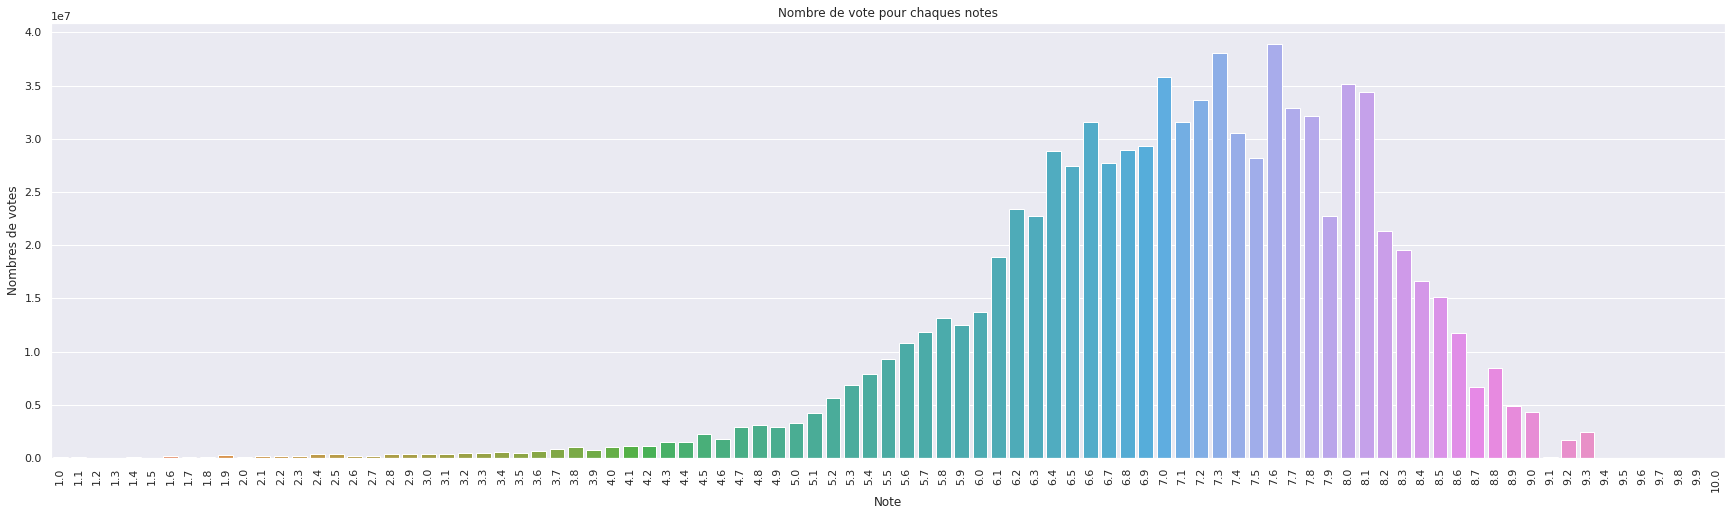

In [138]:
plt.figure(figsize=(30,8))
plt.subplot(111)

sns.set_theme()#Choix d'un theme
sns.set(style="darkgrid")
sns.barplot(data=numVote_rating , x = "averageRating" , y= "numVotes")
plt.title("Nombre de vote pour chaques notes")#Titre
plt.ylabel("Nombres de votes")#Titre des ordonnées
plt.xlabel("Note")#Titre des abcsisses
plt.xticks(rotation=90)

plt.show

Nous pouvons observer que les notes avec un nombre de votant assez consequent varie en 4.0 et 9.0


##Etude de la variables "averageRating" 

###Etude sur les notes supérieur a 9.0

In [139]:
global_movie_rating9=global_movie.loc[(global_movie["averageRating"]>9)]

In [140]:
global_movie_rating9.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
108751,tt0111161,The Shawshank Redemption,1994,142,Drama,9.3,2377444,1990
67289,tt0068646,The Godfather,1972,175,"Crime,Drama",9.2,1646788,1970
4503614,tt2592910,CM101MMXI Fundamentals,2013,139,"Comedy,Documentary",9.2,44144,2010
242103,tt0252487,Hababam Sinifi,1975,87,"Comedy,Drama",9.3,37907,1970
5710617,tt5354160,Aynabaji,2016,147,"Crime,Mystery,Thriller",9.1,23517,2010
...,...,...,...,...,...,...,...,...
6695568,tt7518474,War Journal: The Incredible World War II Escap...,2014,84,Documentary,9.4,5,2010
5395401,tt4642756,A Kind of Sisterhood,2015,75,Documentary,9.2,5,2010
3026313,tt13606224,All the Way,2020,60,"Documentary,Sport",9.4,5,2020
6727839,tt7587734,Rocio,2018,63,"Documentary,Drama",9.2,5,2010


####Film avec une note supérieur a 9.0 avec plus de 1000 votes

In [141]:
global_movie_rating9_1000votes=global_movie_rating9.loc[(global_movie["numVotes"]>999)]

In [142]:
global_movie_rating9_1000votes.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
108751,tt0111161,The Shawshank Redemption,1994,142,Drama,9.3,2377444,1990
67289,tt0068646,The Godfather,1972,175,"Crime,Drama",9.2,1646788,1970
4503614,tt2592910,CM101MMXI Fundamentals,2013,139,"Comedy,Documentary",9.2,44144,2010
242103,tt0252487,Hababam Sinifi,1975,87,"Comedy,Drama",9.3,37907,1970
5710617,tt5354160,Aynabaji,2016,147,"Crime,Mystery,Thriller",9.1,23517,2010
4233120,tt2185022,Love on a Leash,2011,90,"Comedy,Drama,Fantasy",9.1,6916,2010
5982388,tt5963218,Aloko Udapadi,2017,113,"Drama,History",9.1,6656,2010
239559,tt0249795,Maya Bazaar,1957,192,"Comedy,Drama",9.1,4195,1950
367784,tt0383177,Aguner Poroshmoni,1994,123,"Drama,War",9.1,2808,1990
5897926,tt5773402,Dominion,2018,120,Documentary,9.1,2705,2010


####Film avec une note supérieur a 9.0 avec plus de 100 votes et moin de 1000 votes

In [143]:
global_movie_rating9_100votes=global_movie_rating9.loc[(global_movie["numVotes"]>99)&(global_movie["numVotes"]<1000)]

In [144]:
global_movie_rating9_100votes.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
5832205,tt5624252,That Vitamin Movie,2016,86,Documentary,9.2,941,2010
1463721,tt10867504,Fan,2019,145,Drama,9.1,906,2010
4520120,tt2632928,The Epic Journey,2015,100,Documentary,9.1,825,2010
7643737,tt9536810,Randhawa,2019,130,Drama,9.1,724,2010
7256701,tt8718580,Eghantham,2018,125,Drama,9.1,648,2010
...,...,...,...,...,...,...,...,...
2940830,tt13456656,Superstars: The Extended Version,2021,90,Documentary,9.5,108,2020
6732880,tt7598716,Maassab (The Teacher),2021,116,Drama,9.9,104,2020
4774678,tt3238168,Limo Ride,2014,83,"Comedy,Documentary",9.4,101,2010
6920538,tt8000390,Jack the Detective: The Movie,2020,110,"Adventure,Crime,Mystery",9.1,101,2020


####Film avec une note supérieur a 9.0 avec moin de 100 votes

In [145]:
global_movie_rating9_moin100votes=global_movie_rating9.loc[(global_movie["numVotes"]<100)]

In [146]:
global_movie_rating9_moin100votes.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
2599556,tt12857614,"Love, Life & Pakodi",2021,120,Romance,9.1,99,2020
4926075,tt3588852,A Dog Named Gucci,2015,90,"Biography,Documentary,Drama",9.1,99,2010
2038443,tt11874886,Ostatni Ludzie Czarnobyla 3,2020,70,Documentary,9.8,97,2020
6057928,tt6131632,Pague Um & Leve Todos,2009,88,"Comedy,Musical",9.4,95,2000
5343723,tt4526656,For the Love of Ruth,2015,80,Drama,9.3,95,2010
...,...,...,...,...,...,...,...,...
2141341,tt1205482,Fatima,2009,90,Documentary,9.6,5,2000
2066830,tt1192418,Kunku Zale Vairi,2005,150,Drama,9.6,5,2000
5787927,tt5525022,Until Cancer Do Us Part,2016,87,Documentary,9.2,5,2010
5873392,tt5716726,The Caravan Film,2015,105,Documentary,9.4,5,2010


###Etude sur les notes inférieur a 4.0

In [147]:
global_movie_rating4=global_movie.loc[(global_movie["averageRating"]<4)]

In [148]:
global_movie_rating4.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
116019,tt0118688,Batman & Robin,1997,125,"Action,Sci-Fi",3.8,236354,1990
314037,tt0327554,Catwoman,2004,104,"Action,Crime,Fantasy",3.4,112155,2000
775478,tt0799949,Epic Movie,2007,86,"Adventure,Comedy,Fantasy",2.4,102246,2000
1387914,tt1073498,Meet the Spartans,2008,87,"Animation,Comedy,Fantasy",2.8,102027,2000
2187945,tt1213644,Disaster Movie,2008,87,"Comedy,Sci-Fi",1.9,87635,2000
...,...,...,...,...,...,...,...,...
176569,tt0182922,La comedia inmortal,1951,95,"Comedy,Drama",3.0,5,1950
177080,tt0183478,Male stvari,1957,83,Drama,3.6,5,1950
178213,tt0184688,Love in Canada,1979,130,"Drama,Romance",3.0,5,1970
357140,tt0372207,Chelyabumbiya,2003,115,"Comedy,Drama,Romance",3.0,5,2000


####Film avec une note inférieur a 4.0 avec plus  1000 votes

In [149]:
global_movie_rating4_1000votes=global_movie_rating4.loc[(global_movie["numVotes"]>999)]

In [150]:
global_movie_rating4_1000votes.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
116019,tt0118688,Batman & Robin,1997,125,"Action,Sci-Fi",3.8,236354,1990
314037,tt0327554,Catwoman,2004,104,"Action,Crime,Fantasy",3.4,112155,2000
775478,tt0799949,Epic Movie,2007,86,"Adventure,Comedy,Fantasy",2.4,102246,2000
1387914,tt1073498,Meet the Spartans,2008,87,"Animation,Comedy,Fantasy",2.8,102027,2000
2187945,tt1213644,Disaster Movie,2008,87,"Comedy,Sci-Fi",1.9,87635,2000
...,...,...,...,...,...,...,...,...
3618388,tt1540761,Amphibious 3D,2010,83,"Action,Adventure,Comedy",3.5,1004,2010
52938,tt0053944,The Incredible Petrified World,1959,70,"Action,Adventure,Sci-Fi",3.1,1003,1950
5667796,tt5258074,Crossbreed,2019,86,"Action,Comedy,Sci-Fi",3.8,1002,2010
3852415,tt1784670,The Malay Chronicles: Bloodlines,2011,109,"Action,Adventure",3.7,1000,2010


####Film avec une note inférieur à 4.0 avec plus de 100 votes et moin de 1000 votes

In [151]:
global_movie_rating4_100votes=global_movie_rating4.loc[(global_movie["numVotes"]>99)&(global_movie["numVotes"]<1000)]

In [152]:
global_movie_rating4_100votes.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
4492019,tt2564978,Lost Time,2014,93,"Horror,Sci-Fi,Thriller",2.8,999,2010
95643,tt0097781,Lords of the Deep,1989,77,"Sci-Fi,Thriller",2.6,995,1980
3834653,tt1765729,Brigada: Naslednik,2012,120,"Action,Crime",2.6,995,2010
1289998,tt1056467,Dying God,2008,125,"Horror,Sci-Fi,Thriller",2.7,994,2000
5939471,tt5867226,Silencer,2018,88,"Action,Drama,Thriller",3.9,994,2010
...,...,...,...,...,...,...,...,...
7708289,tt9673398,"Odazivam Ti se, Boze",1996,78,Documentary,3.7,100,1990
4395671,tt2369702,Bank Roll,2012,91,"Comedy,Crime,Drama",2.6,100,2010
4979159,tt3710938,Alone in the Dead of Night,2017,95,"Drama,Fantasy,Horror",3.2,100,2010
4237478,tt2189978,The Yank,2014,89,Comedy,3.7,100,2010


####Film avec une note inférieur a 4.0 avec moin de 100 votes

In [153]:
global_movie_rating4_moin100votes=global_movie_rating4.loc[(global_movie["numVotes"]<100)]

In [154]:
global_movie_rating4_moin100votes.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
4295395,tt2255976,Blood for Irina,2012,70,Horror,3.5,99,2010
77366,tt0079011,Agowa gongpo,1978,100,Horror,3.7,99,1970
5437607,tt4737684,Seekers,2016,90,Horror,3.2,99,2010
339382,tt0353879,Phobias,2003,75,"Horror,Thriller",3.6,99,2000
6144271,tt6323264,Psychotic!,2016,87,"Horror,Mystery",3.4,99,2010
...,...,...,...,...,...,...,...,...
1232493,tt10463488,Podsolnukh,2020,106,Drama,2.2,5,2020
136580,tt0140599,Tanz ins Glück,1951,98,"Comedy,Musical,Romance",3.6,5,1950
5427134,tt4714496,El último quilombo,2012,65,Documentary,3.6,5,2010
6624119,tt7366340,'Twas the Shift Before Christmas,2012,64,Comedy,3.8,5,2010


##Etude de la variables "numVotes" 

### Etude sur les films ayant reçu moin de 1000 votes

In [155]:
global_movie_inf_1000_vote=global_movie.loc[(global_movie["numVotes"]<1000)]

In [156]:
global_movie_inf_1000_vote.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
57812,tt0058917,Arizona Raiders,1965,97,Western,6.0,999,1960
2306839,tt1234550,Rage,2009,98,Drama,4.8,999,2000
50085,tt0050993,Something of Value,1957,113,"Drama,War",6.5,999,1950
4492019,tt2564978,Lost Time,2014,93,"Horror,Sci-Fi,Thriller",2.8,999,2010
5676889,tt5278592,Kate Plays Christine,2016,112,"Biography,Documentary,Drama",6.3,999,2010
...,...,...,...,...,...,...,...,...
2447285,tt12592414,Living Soil,2018,60,Documentary,6.0,5,2010
2468718,tt1262951,Rätten till staden,2008,70,Documentary,6.8,5,2000
2479980,tt1264897,Mosquito Kingdom,2008,103,Crime,5.2,5,2000
2487108,tt1266131,Flieger über Amazonien,2008,80,Drama,7.2,5,2000


### Etude sur les films ayant reçu moin de 500 votes

In [157]:
global_movie_inf_500_vote=global_movie.loc[(global_movie["numVotes"]<500)]

In [158]:
global_movie_inf_500_vote.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
5434451,tt4730838,Dyrene i Hakkebakkeskogen,2016,75,"Animation,Family,Musical",6.9,499,2010
64120,tt0065408,Anonimo veneziano,1970,91,"Drama,Music,Romance",7.0,499,1970
6250135,tt6557704,Ultra Low,2018,117,Drama,8.0,499,2010
6242418,tt6540984,#SquadGoals,2018,90,"Drama,Thriller",4.1,499,2010
255695,tt0266703,Gong woo gau gap,2000,111,"Comedy,Crime",7.0,499,2000
...,...,...,...,...,...,...,...,...
265731,tt0277217,La pantera de Monte Escondido,1962,90,"Drama,Mystery,Western",6.2,5,1960
265728,tt0277214,La pandilla en acción,1959,86,"Action,Adventure,Comedy",5.4,5,1950
265583,tt0277058,El justiciero vengador,1962,87,"Adventure,Drama,Western",4.6,5,1960
37979,tt0038649,It's Great to Be Young,1946,69,Musical,6.2,5,1940


###Etude sur les films ayant recu moin de 100 votes

In [159]:
global_movie_inf_100_vote=global_movie.loc[(global_movie["numVotes"]<100)]

In [160]:
global_movie_inf_100_vote.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
4866841,tt3449664,Captain Webb,2015,87,Drama,5.9,99,2010
5530987,tt4950280,The Madness of Max,2015,157,Documentary,7.7,99,2010
5913342,tt5808370,Datsche,2018,94,Comedy,7.0,99,2010
39480,tt0040169,Black Hills,1947,60,Western,6.1,99,1940
4295395,tt2255976,Blood for Irina,2012,70,Horror,3.5,99,2010
...,...,...,...,...,...,...,...,...
4197631,tt2145114,Kid Creole & The Coconuts: Live in Paris,2001,100,Music,8.0,5,2000
178557,tt0185047,El último piso,1962,100,Drama,6.2,5,1960
4199550,tt2147211,Bansari,1978,108,Romance,6.0,5,1970
4202421,tt2150440,Drop City,2012,82,"Documentary,Drama",8.6,5,2010


###Etude sur les films ayant recu moin de 20 votes

In [170]:
global_movie_inf_20_vote=global_movie.loc[(global_movie["numVotes"]<20)]

In [171]:
global_movie_inf_20_vote.sort_values("numVotes", ascending=False)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
333381,tt0347726,Ang pagbabalik ni Pedro Penduko,1994,111,"Action,Adventure,Comedy",7.6,19,1990
4018486,tt1958088,What Would Bear Do?,2013,89,"Adventure,Comedy",5.6,19,2010
46110,tt0046940,Le due orfanelle,1954,95,"Adventure,Drama",5.9,19,1950
281277,tt0293456,Nilagiri Express,1968,133,"Mystery,Thriller",6.8,19,1960
46164,tt0046997,Eine Frau von heute,1954,102,Drama,6.1,19,1950
...,...,...,...,...,...,...,...,...
4135002,tt2078573,Confidence Man: The Hugh DeNeal Story,2011,93,"Biography,Documentary,Music",9.2,5,2010
4725061,tt3123154,Nerawareta otoko,1956,68,Drama,6.8,5,1950
4134324,tt2077869,Hei lung,1973,97,"Action,Crime",5.4,5,1970
191142,tt0198531,"Hau drauf, Kleiner",1974,82,Comedy,8.0,5,1970


#Base de donnée

In [172]:
global_movie.shape

(213138, 8)

In [173]:
global_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213138 entries, 5013 to 7824022
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          213138 non-null  object 
 1   originalTitle   213138 non-null  object 
 2   startYear       213138 non-null  int64  
 3   runtimeMinutes  213138 non-null  int64  
 4   genres          213138 non-null  object 
 5   averageRating   213138 non-null  float64
 6   numVotes        213138 non-null  int64  
 7   decade          213138 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 24.6+ MB


#Exportation de la base de donnée

In [174]:
global_movie.to_csv('df_final.csv')
!cp df_final.csv "drive/My Drive/"